<a href="https://colab.research.google.com/github/ikikika/data_science/blob/ml_algorithms/boosting_and_optimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/ikikika/data_science/ml_algorithms/cancer.csv')

dataset.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [24]:
x = dataset.iloc[:, 2:29].values
y = dataset.iloc[:, 1].values # because we want to predict value for column[1], diagnosis

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

print(x_train)
# note: sometimes, scaling doesnt help in accuracy

[[-0.72427059 -0.02895552 -0.76061684 ... -0.45100338 -0.92152015
  -0.93848301]
 [-0.8328743   1.81708623 -0.86727123 ... -1.7622065  -0.70381307
  -0.79512206]
 [-0.14981409 -0.12855376 -0.1630202  ...  0.42399837  0.01178066
  -0.38744691]
 ...
 [-1.24556843  0.03821538 -1.19138441 ...  1.00444508 -0.15481259
  -0.04579007]
 [-0.9128981  -0.99714304 -0.91250598 ... -1.00545993 -0.3567438
  -0.57152718]
 [-0.7957204   0.40186476 -0.78219671 ...  0.9957817  -0.54984052
  -0.4741863 ]]


# Principle Component Analysis (PCA)
* We have a lot of features
* PCA will reduce the number of features
* Similiar to linear regression
* Linear regression: measure vertical distance to regression line
* PCA: measure direct (perpendicular) distance to regression line
* we can have x as scaler value

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1) # take all feature in x and turn them into 1 single feature
x_train_scaled = pca.fit_transform(x_train)
print(x_train_scaled[:10])
# from print(x_train), we have many different values from different features. 
# scaling them turns them into 1 feature 

[[-1.03501952]
 [-1.98300081]
 [ 0.65951683]
 [-0.91504357]
 [-2.2373985 ]
 [-2.15130333]
 [-0.66304274]
 [-2.8651742 ]
 [-4.1235241 ]
 [-2.16701192]]


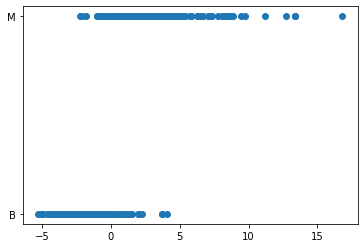

In [5]:
import matplotlib.pyplot as plt
plt.scatter(x_train_scaled, y_train)
plt.show()
# we see that the values from x~-2.5 to x~2.5, there are overlaps. 
# if the model is accurate, there should be no overlaps, as we assume 1 set of conditions will lead to 1 diagnosis, no possibility of have both diagnosises
# model may not be accurate as features are reduced too much

# Gradient Boosting
* Take a bunch of different models
* Use something called gradient descent
* Try to find the best model
* Take different features from different tinier models
* Combine them all together to form one massive very accurate model



In [27]:
from sklearn.ensemble import GradientBoostingClassifier

gradientBoost = GradientBoostingClassifier()
gradientBoost.fit(x_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [28]:
y_predict = gradientBoost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[73  5]
 [ 1 35]]


# Extreme Gradient Boosting (XGBoost)
* Similiar to regular gradeint boosting
* Has a couple of hyper-parameters adjusted

**Wins more kaggle competitions**


In [29]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [30]:
y_predict = xgboost.predict(x_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_predict))

[[74  4]
 [ 1 35]]
